# Data Exploration & Visualization

Explore all datasets with rich visualizations:
- MVTec AD (15 categories)
- KolektorSDD2
- NEU Surface Defect (6 classes)

In [1]:
import sys
sys.path.insert(0, 'F:/Thesis')

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter

from src.config import FIGURES_DIR, MVTEC_CATEGORIES, NEU_CATEGORIES, ensure_dirs
from src.data import MVTecDataset, KolektorDataset, NEUDataset
from src.data.transforms import denormalize

ensure_dirs()
plt.style.use('seaborn-v0_8-whitegrid')

## 1. MVTec AD Dataset

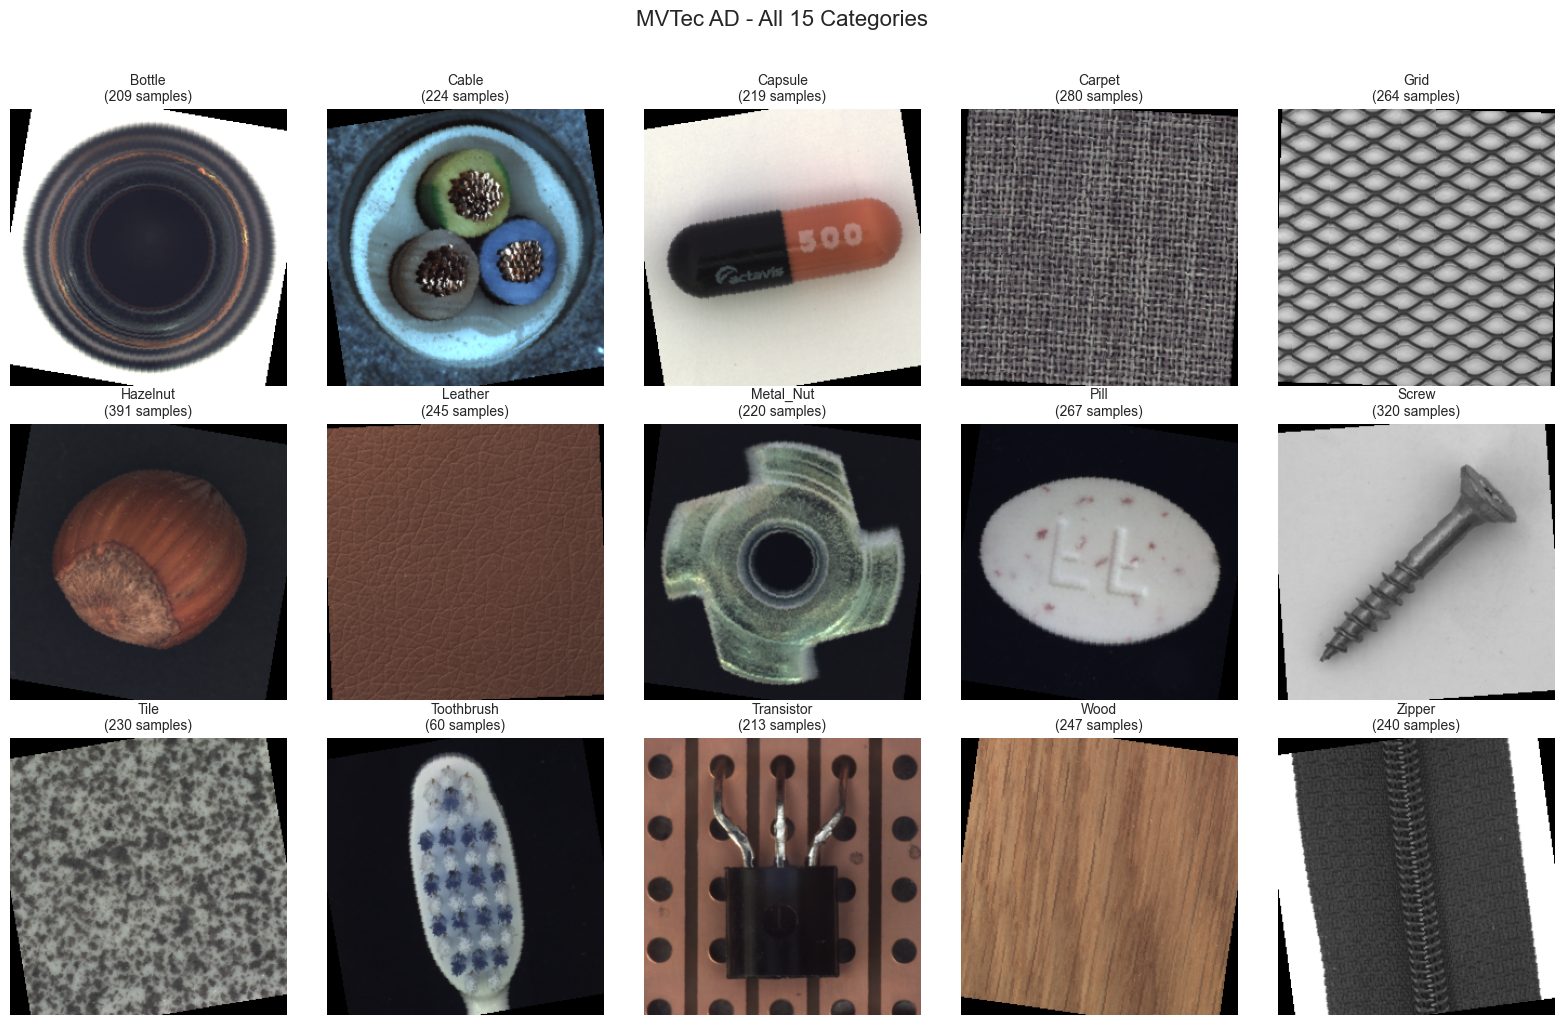

In [2]:
# Overview of all 15 categories
fig, axes = plt.subplots(3, 5, figsize=(16, 10))
for i, cat in enumerate(MVTEC_CATEGORIES):
    ax = axes[i//5, i%5]
    ds = MVTecDataset(category=cat, split='train')
    img, _ = ds[np.random.randint(len(ds))]
    img_np = denormalize(img).permute(1, 2, 0).numpy().clip(0, 1)
    ax.imshow(img_np)
    ax.set_title(f'{cat.title()}\n({len(ds)} samples)', fontsize=10)
    ax.axis('off')

plt.suptitle('MVTec AD - All 15 Categories', fontsize=16, y=1.02)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'mvtec_all_categories.png', dpi=150, bbox_inches='tight')
plt.show()

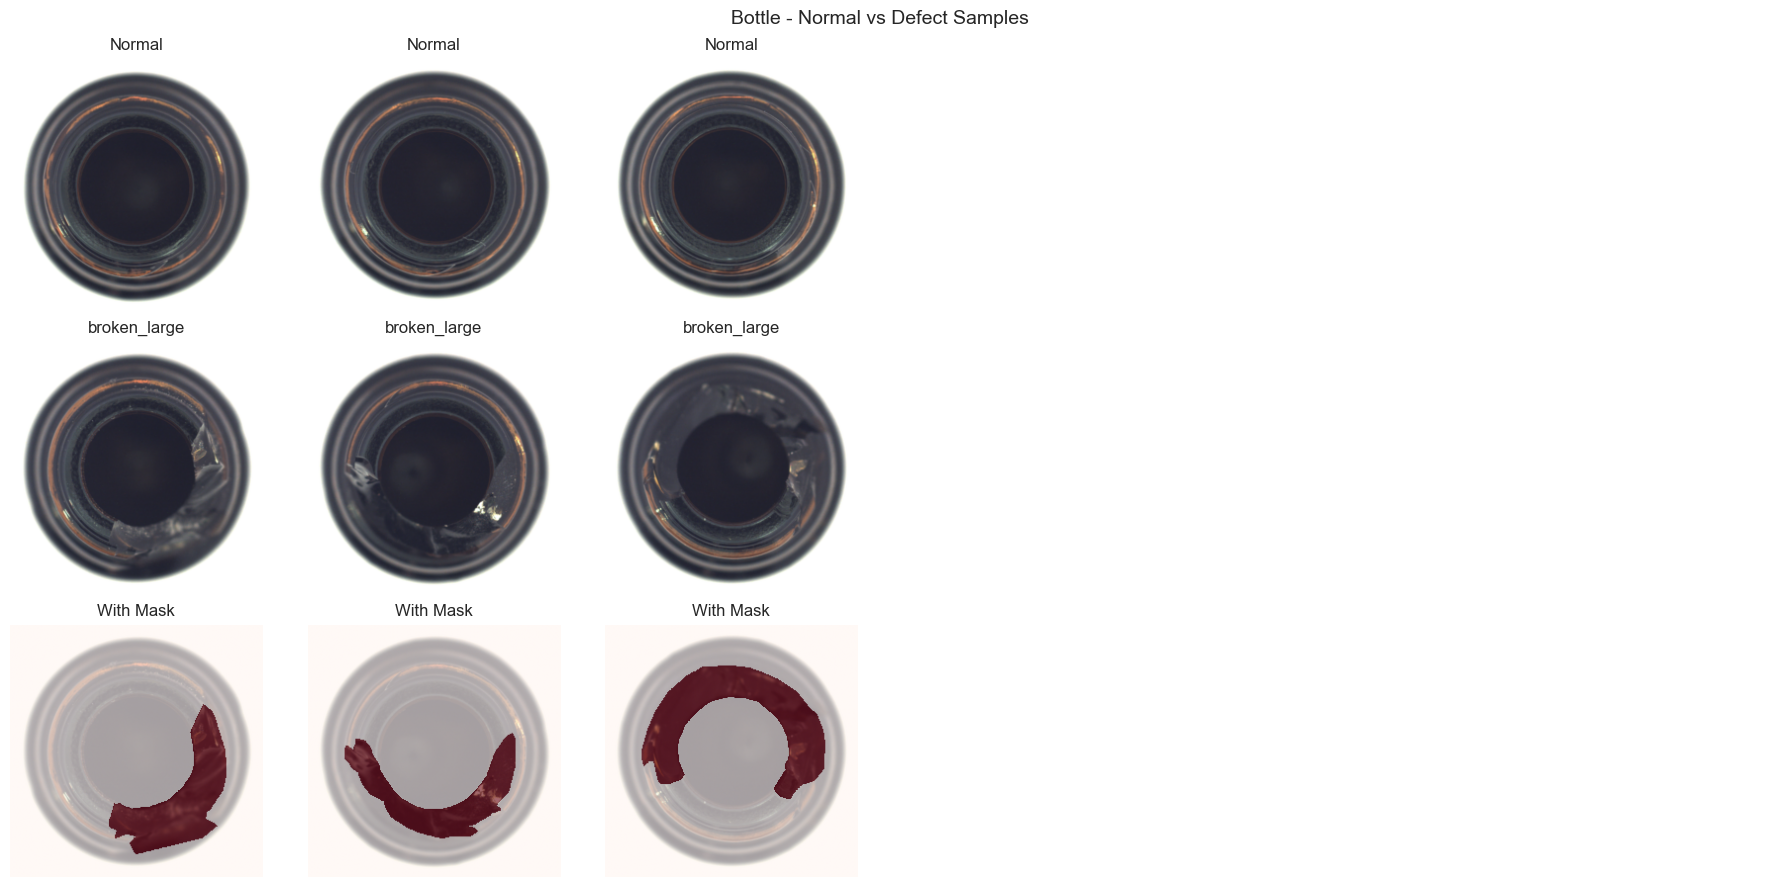

In [3]:
# Detailed view: Normal vs Defect for bottle
cat = 'bottle'
train_ds = MVTecDataset(category=cat, split='train')
test_ds = MVTecDataset(category=cat, split='test', return_mask=True)

# Find normal and defect samples from test
normal_idx = [i for i, l in enumerate(test_ds.labels) if l == 0][:3]
defect_idx = [i for i, l in enumerate(test_ds.labels) if l == 1][:3]

fig, axes = plt.subplots(3, 6, figsize=(18, 9))

# Normal samples
for i, idx in enumerate(normal_idx):
    img, mask, label = test_ds[idx]
    axes[0, i].imshow(denormalize(img).permute(1, 2, 0).numpy().clip(0, 1))
    axes[0, i].set_title('Normal')
    axes[0, i].axis('off')

# Defect samples with masks
for i, idx in enumerate(defect_idx):
    img, mask, label = test_ds[idx]
    img_np = denormalize(img).permute(1, 2, 0).numpy().clip(0, 1)
    mask_np = mask[0].numpy()
    
    axes[1, i].imshow(img_np)
    axes[1, i].set_title(test_ds.get_defect_type(idx))
    axes[1, i].axis('off')
    
    axes[2, i].imshow(img_np)
    axes[2, i].imshow(mask_np, cmap='Reds', alpha=0.6)
    axes[2, i].set_title('With Mask')
    axes[2, i].axis('off')

# Hide unused axes
for j in range(3, 6):
    axes[0, j].axis('off')
    axes[1, j].axis('off')
    axes[2, j].axis('off')

plt.suptitle(f'{cat.title()} - Normal vs Defect Samples', fontsize=14)
plt.tight_layout()
plt.savefig(FIGURES_DIR / f'mvtec_{cat}_samples.png', dpi=150)
plt.show()

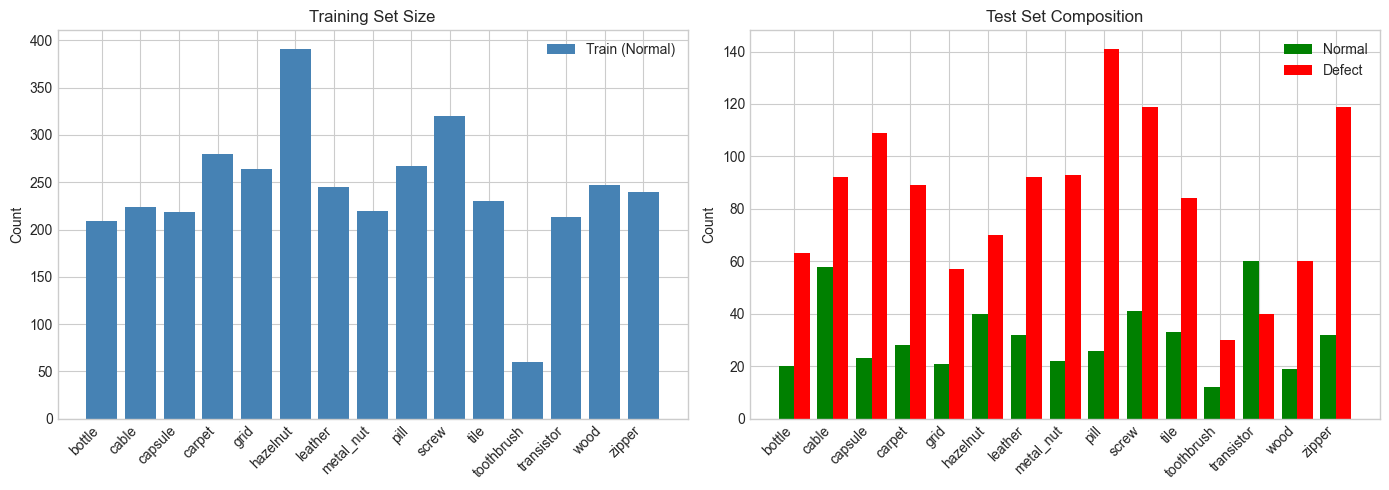

Category  Train  Test Normal  Test Defect
0       bottle    209           20           63
1        cable    224           58           92
2      capsule    219           23          109
3       carpet    280           28           89
4         grid    264           21           57
5     hazelnut    391           40           70
6      leather    245           32           92
7    metal_nut    220           22           93
8         pill    267           26          141
9        screw    320           41          119
10        tile    230           33           84
11  toothbrush     60           12           30
12  transistor    213           60           40
13        wood    247           19           60
14      zipper    240           32          119

In [4]:
# Statistics plot
stats = []
for cat in MVTEC_CATEGORIES:
    train_ds = MVTecDataset(category=cat, split='train')
    test_ds = MVTecDataset(category=cat, split='test')
    stats.append({
        'Category': cat,
        'Train': len(train_ds),
        'Test Normal': sum(1 for l in test_ds.labels if l == 0),
        'Test Defect': sum(1 for l in test_ds.labels if l == 1),
    })

df = pd.DataFrame(stats)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Stacked bar
x = np.arange(len(df))
axes[0].bar(x, df['Train'], label='Train (Normal)', color='steelblue')
axes[0].set_xticks(x)
axes[0].set_xticklabels(df['Category'], rotation=45, ha='right')
axes[0].set_ylabel('Count')
axes[0].set_title('Training Set Size')
axes[0].legend()

# Test set composition
axes[1].bar(x - 0.2, df['Test Normal'], 0.4, label='Normal', color='green')
axes[1].bar(x + 0.2, df['Test Defect'], 0.4, label='Defect', color='red')
axes[1].set_xticks(x)
axes[1].set_xticklabels(df['Category'], rotation=45, ha='right')
axes[1].set_ylabel('Count')
axes[1].set_title('Test Set Composition')
axes[1].legend()

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'mvtec_statistics.png', dpi=150)
plt.show()

display(df)

## 2. KolektorSDD2 Dataset

Train samples: 2332
Test samples: 1004


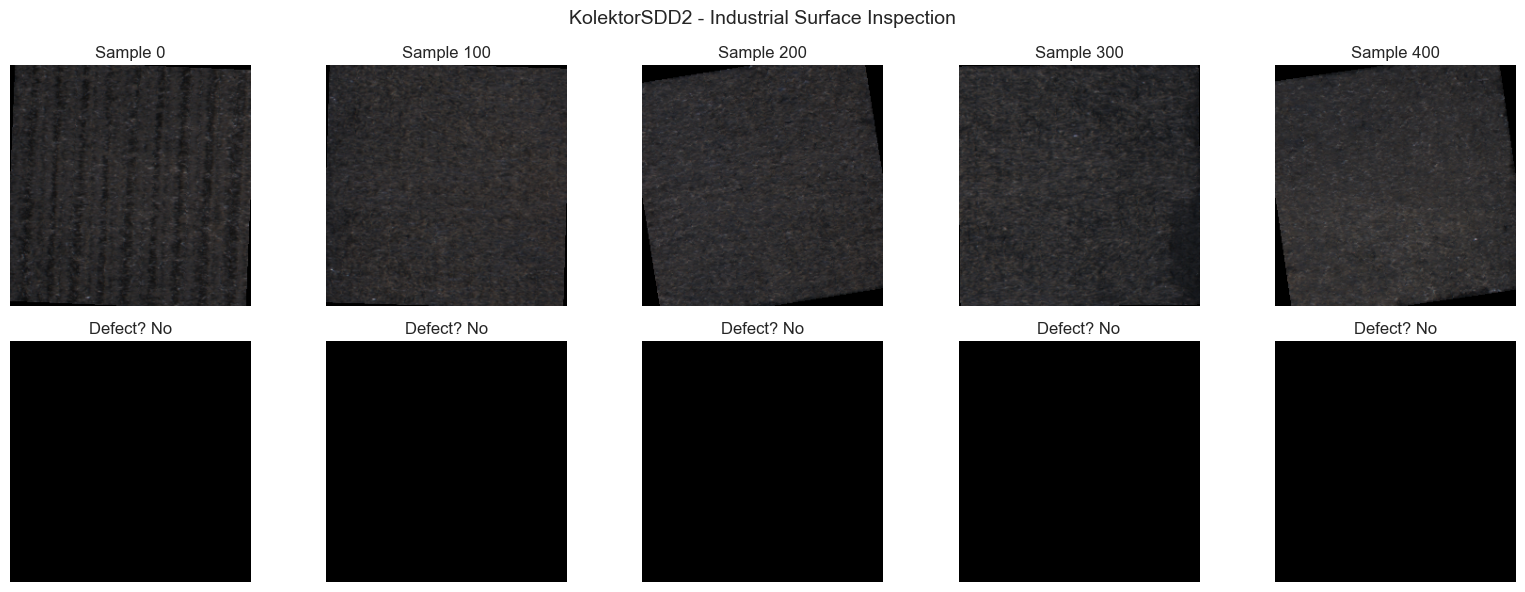

In [5]:
# Load Kolektor dataset
train_ds = KolektorDataset(split='train')
test_ds = KolektorDataset(split='test')

print(f'Train samples: {len(train_ds)}')
print(f'Test samples: {len(test_ds)}')

# Visualize samples
fig, axes = plt.subplots(2, 5, figsize=(16, 6))

for i in range(5):
    idx = i * 100
    img, mask, label = train_ds[idx]
    img_np = denormalize(img).permute(1, 2, 0).numpy().clip(0, 1)
    mask_np = mask[0].numpy()
    
    axes[0, i].imshow(img_np)
    axes[0, i].set_title(f'Sample {idx}')
    axes[0, i].axis('off')
    
    axes[1, i].imshow(mask_np, cmap='gray')
    axes[1, i].set_title('Defect? ' + ('Yes' if label else 'No'))
    axes[1, i].axis('off')

plt.suptitle('KolektorSDD2 - Industrial Surface Inspection', fontsize=14)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'kolektor_samples.png', dpi=150)
plt.show()

## 3. NEU Surface Defect Dataset

Train samples: 1440
Validation samples: 360
Categories: ['crazing', 'inclusion', 'patches', 'pitted_surface', 'rolled-in_scale', 'scratches']


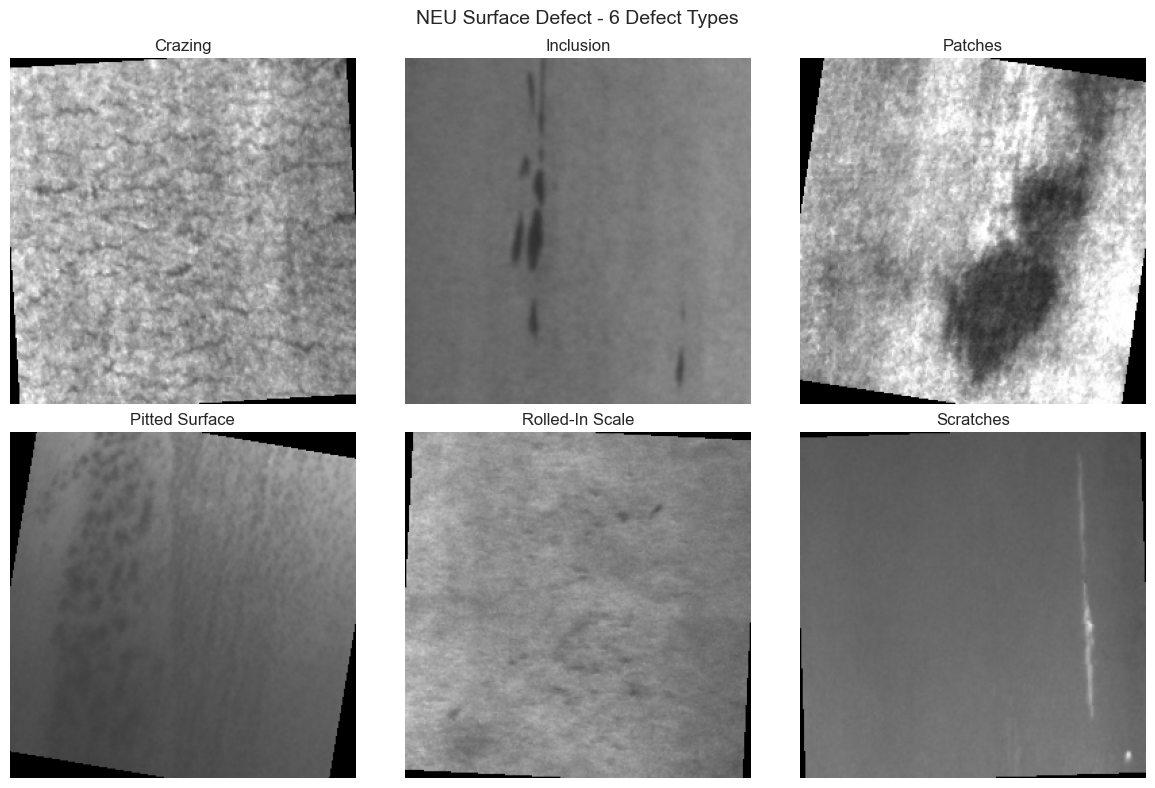

In [6]:
# Load NEU dataset
train_ds = NEUDataset(split='train')
val_ds = NEUDataset(split='validation')

print(f'Train samples: {len(train_ds)}')
print(f'Validation samples: {len(val_ds)}')
print(f'Categories: {NEU_CATEGORIES}')

# Sample from each class
fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i, cat in enumerate(NEU_CATEGORIES):
    # Find sample of this category
    idx = train_ds.category_names.index(cat)
    img, label = train_ds[idx]
    img_np = denormalize(img).permute(1, 2, 0).numpy().clip(0, 1)
    
    ax = axes[i//3, i%3]
    ax.imshow(img_np)
    ax.set_title(cat.replace('_', ' ').title(), fontsize=12)
    ax.axis('off')

plt.suptitle('NEU Surface Defect - 6 Defect Types', fontsize=14)
plt.tight_layout()
plt.savefig(FIGURES_DIR / 'neu_categories.png', dpi=150)
plt.show()

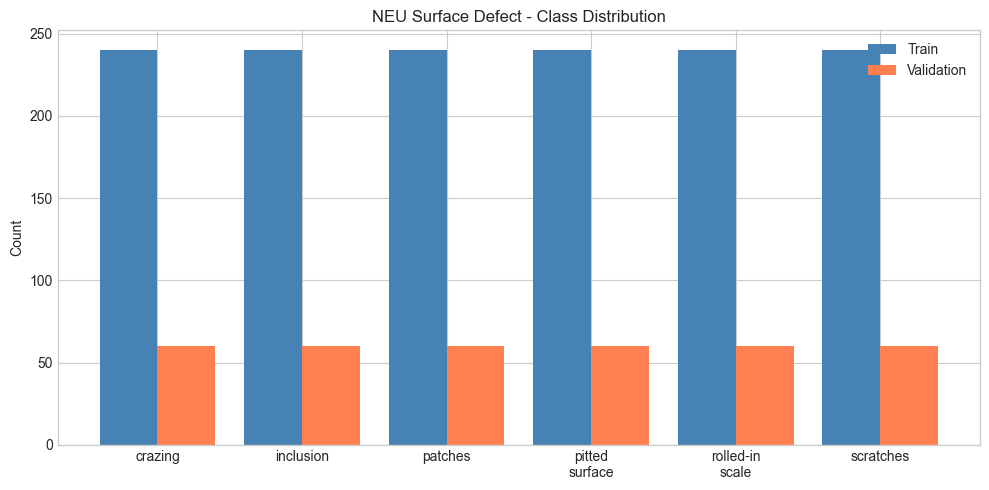

In [7]:
# Class distribution
train_counts = Counter(train_ds.category_names)
val_counts = Counter(val_ds.category_names)

fig, ax = plt.subplots(figsize=(10, 5))
x = np.arange(len(NEU_CATEGORIES))

ax.bar(x - 0.2, [train_counts[c] for c in NEU_CATEGORIES], 0.4, label='Train', color='steelblue')
ax.bar(x + 0.2, [val_counts[c] for c in NEU_CATEGORIES], 0.4, label='Validation', color='coral')

ax.set_xticks(x)
ax.set_xticklabels([c.replace('_', '\n') for c in NEU_CATEGORIES])
ax.set_ylabel('Count')
ax.set_title('NEU Surface Defect - Class Distribution')
ax.legend()

plt.tight_layout()
plt.savefig(FIGURES_DIR / 'neu_distribution.png', dpi=150)
plt.show()

## 4. Summary

In [8]:
# Create summary table
summary = pd.DataFrame([
    {'Dataset': 'MVTec AD', 'Categories': 15, 'Train': '~3,629', 'Test': '~1,725', 'Task': 'Unsupervised AD'},
    {'Dataset': 'KolektorSDD2', 'Categories': 1, 'Train': '2,332', 'Test': '1,004', 'Task': 'Unsupervised AD'},
    {'Dataset': 'NEU Surface', 'Categories': 6, 'Train': '1,440', 'Test': '360', 'Task': 'Supervised Classification'},
])

print('\n' + '='*60)
print('DATASET SUMMARY')
print('='*60)
display(summary)

print('\nGenerated Visualizations:')
for f in sorted(FIGURES_DIR.glob('*.png')):
    print(f'  - {f.name}')


DATASET SUMMARY


Dataset  Categories   Train    Test                       Task
0      MVTec AD          15  ~3,629  ~1,725            Unsupervised AD
1  KolektorSDD2           1   2,332   1,004            Unsupervised AD
2   NEU Surface           6   1,440     360  Supervised Classification


Generated Visualizations:
  - kolektor_samples.png
  - mvtec_all_categories.png
  - mvtec_bottle_samples.png
  - mvtec_statistics.png
  - neu_categories.png
  - neu_distribution.png
